# Foundations of AI: Assignment 1

**Group 2**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

For this assignment we are working on the Gym Memberships dataset that details demographic, behavorial and descriptive data of Gym members.

### Load Dataset
We load the dataset into a DataFrame from the provided CSV

In [3]:
df = pd.read_csv("GymMembers.csv")

Each column in the dataframe is a feature. We retrieve the feature names

In [4]:
feature_names = df.columns
print(f"The dataset has {len(feature_names)} features. These are:")
for name in feature_names:
    print(f"{name}")

The dataset has 15 features. These are:
Age
Gender
Weight (kg)
Height (m)
Max_BPM
Avg_BPM
Resting_BPM
Session_Duration (hours)
Calories_Burned
Workout_Type
Fat_Percentage
Water_Intake (liters)
Workout_Frequency (days/week)
Experience_Level
BMI


In [5]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Displaying the first 5 columns of the dataset we can derive a few details about the dataset:
1. The dataset contains:

   1. Categorical Data:
       1. Gender
       2. Workout Type
    2. Ordinal Data:
        1. Experience Level
    3. Quantitative Data:
       1. Age
       2. Weight (kg)
       3. Height (m)
       4. Max_BPM
       5. Avg_BPM
       6. Resting_BPM
       7. Session_Duration (hours)
       8. Calories_Burned
       9. Fat_Percentage
       10. Water_Intake (liters)
       11. Workout_Frequency (days/week)
       12. BMI

2. For convenience we can further split the data into 3 groups:
    1. Physical & Body Composition Attributes:
        1. Age
        2. Gender
        3. Weight
        4. Height
        5. BMI
        6. Fat_Percentage
    2. Workout & Performance Metrics:
       1. Max BPM
       2. Avg_BPM
       3. Resting_BPM
       4. Session_Duration
       5. Calories_Burned
    3. Lifestyle & Training Behavior:
       1. Workout_Type
       2. Workout_Frequency
       3. Water_Intake
       4. Experience_Level

In [6]:
df_quant = df.drop(columns=['Gender','Workout_Type','Experience_Level'])

We run info() in order to get the data types and find whether we have any null values in the data.

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    str    
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    str    
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int64  
 13  E

We can see that there are no null values but to confirm we run the block below:

In [8]:
na_count = df.isna().any().sum()
print(f"We have {na_count} columns which have null values")

We have 0 columns which have null values


We do a descriptive analysis of the continuous data to see of the data is sane

In [9]:
df_quant.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,49.840000


We create a countplot for the gender feature.

<Axes: xlabel='Gender', ylabel='count'>

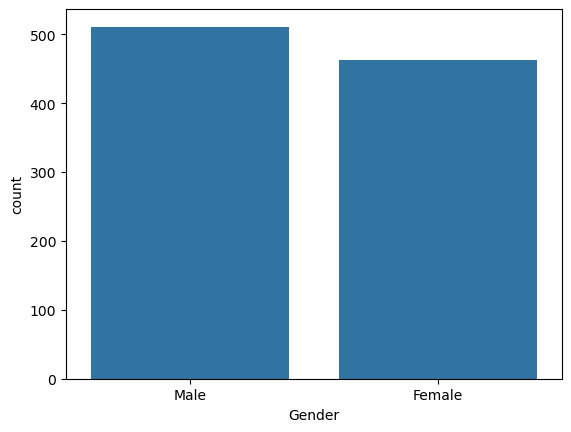

In [10]:
sns.countplot(df, x="Gender")

From the countplot we can see that male and female are fairly even. We get the ratio between male and female:

In [25]:
gender_count = df["Gender"].value_counts()
print(f" The ratio of male-to-female members is: {gender_count["Male"] / gender_count["Female"]}:1") 

 The ratio of male-to-female members is: 1.106060606060606:1


So, as the ratio is near 1, we do not need to stratify splits

We carry out the same process for Experience Level

<Axes: xlabel='Experience_Level', ylabel='count'>

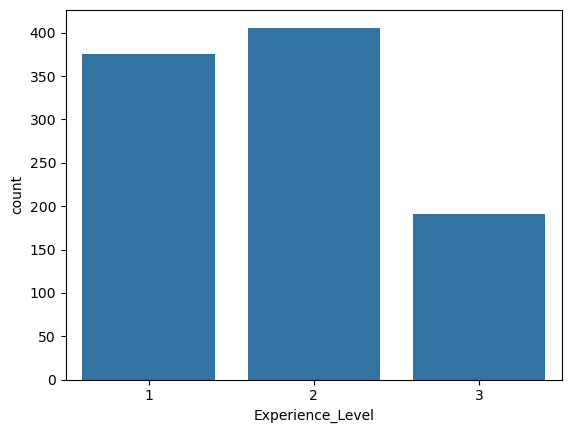

In [12]:
sns.countplot(df, x="Experience_Level")

From the countplot, we can derive that there are significantly fewer members at experience level 3 than at level 1 and 2. This may require special consideration when splitting the dataset

In [32]:
exp_lvl_counts = df["Experience_Level"].value_counts()
print(f" Experience level ratio is {exp_lvl_counts[2] / exp_lvl_counts[3]}:{exp_lvl_counts[1] / exp_lvl_counts[3]}:1") 

 Experience level ratio is 2.1256544502617802:1.968586387434555:1


Based on the ratio, we can see that there is significant class imbalance. So, we will need to stratify based on experience level to ensure excessive impact.

<Axes: xlabel='Workout_Type', ylabel='count'>

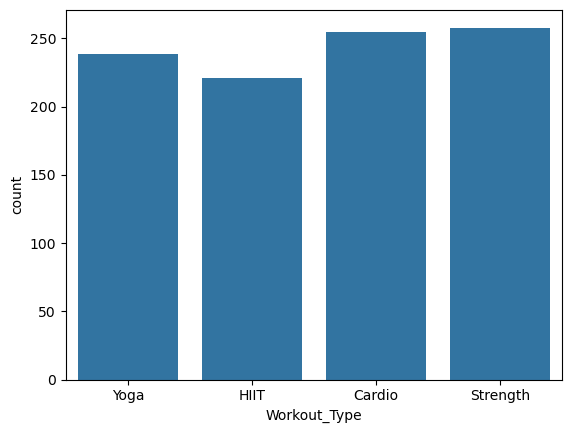

In [13]:
sns.countplot(df, x="Workout_Type")

The workout types are fairly balanced among the types. So, we do not need to stratify based on workout types as the differences will not result in any significant impact

In [35]:
workout_type_count = df["Workout_Type"].value_counts()

print(f"Ratio of Workout Types: {workout_type_count["Yoga"]/workout_type_count["HIIT"]}:{workout_type_count["Strength"]/workout_type_count["HIIT"]}:{workout_type_count["Cardio"]/workout_type_count["HIIT"]}:1")

Ratio of Workout Types: 1.081447963800905:1.167420814479638:1.1538461538461537:1


Basic Functions

easy function to split the features and target into X and y

In [15]:
def split_target_feature(df, target_name):
    if target_name not in df.columns:
        raise ValueError(f"Column '{target_name}' not found in DataFrame.")
    y = df[target_name]
    
    X = df.drop(columns=[target_name])
    
    return X, y

Normal splitting function wiithout needing to stratify make it easy to split data with no categorical info

In [16]:
def split_normal(df, target_name, test_size=0.2, random_state=42): 
    
    X = df.drop(columns=[target_name])
    y = df[target_name]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state
    )

    return X_train, X_test, y_train, y_test

Stratified split useful for splitting and keeping categorical data even

In [17]:
def split_stratified(df, target_name, stratify_col=None, test_size=0.2, random_state=42):

    # No name = strat by target
    if stratify_col is None:
        stratify_col = target_name
    
    if stratify_col not in df.columns:
        raise ValueError(f"Stratification column '{stratify_col}' not found in DataFrame.")

    # Separate Features and Target
    X = df.drop(columns=[target_name])
    y = df[target_name]
    
    # Use main select strat column
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=df[stratify_col] # This is the key change
    )
    
    return X_train, X_test, y_train, y_test

Normalization function. Use after splitting. Ensure you do not pass target with features. they need to ve done seperately or we have data leakage

In [18]:
def standard_scale(X, scaler=None):

    if scaler is None:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = scaler.transform(X)
    
    return X_scaled, scaler

Inverse transform function to get the result on original scale.

In [19]:
def inverse_transform(X, scaler):
    return scaler.inverse_transform(X)

We create a correlation matrix of the quantitative values to confirm if variables are collinear.

In [40]:
corr = df_quant.corr().round(2)

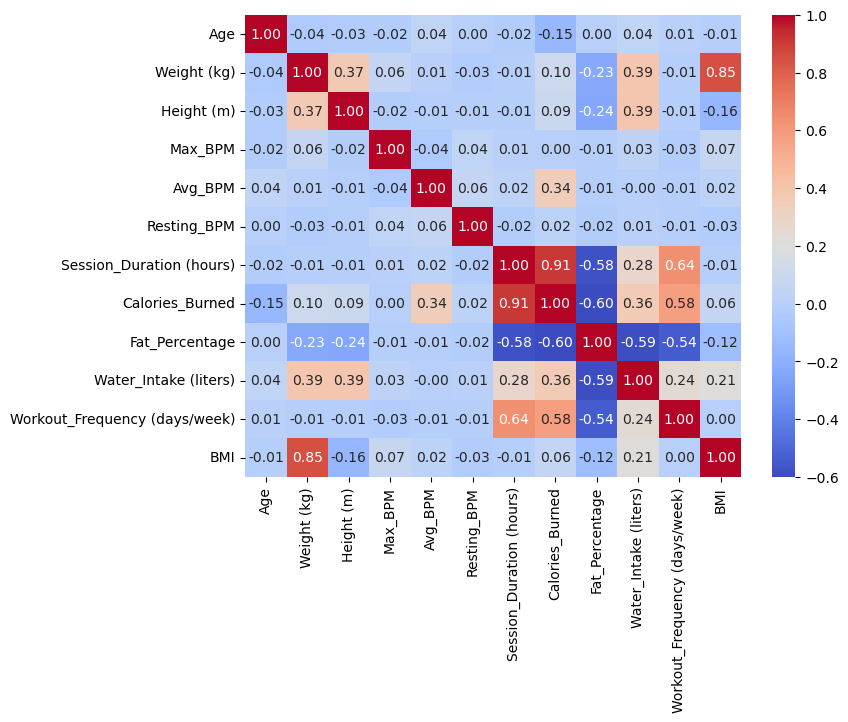

In [46]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,
    fmt=".2f"
)
plt.show()

The correlation matrix reveals strong relationships between workout behavior and fitness related variables. Session duration is highly correlated with calories burned (r = 0.91), workout frequency also shows strong correlations with session duration (r = 0.64) and calories burned (r = 0.58). Body fat percentage exhibits strong negative correlations with workout frequency, session duration, and calories burned, indicating that increased physical activity is associated with lower fat levels. 

Weight and BMI are strongly correlated (r = 0.85), as expected. Most heart rate and demographic variables display weak correlations with other features, suggesting they contribute limited linear predictive power. 

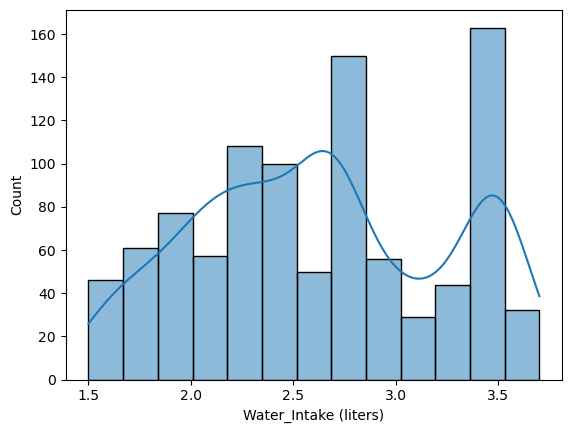

In [57]:
sns.histplot(df["Water_Intake (liters)"], kde=True)
plt.show()

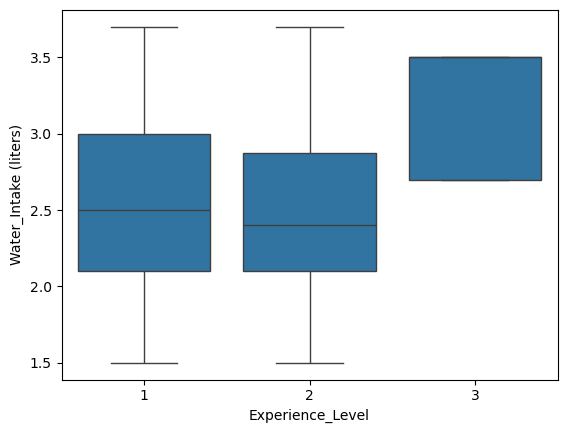

In [58]:
sns.boxplot(data=df, x="Experience_Level", y="Water_Intake (liters)")
plt.show()

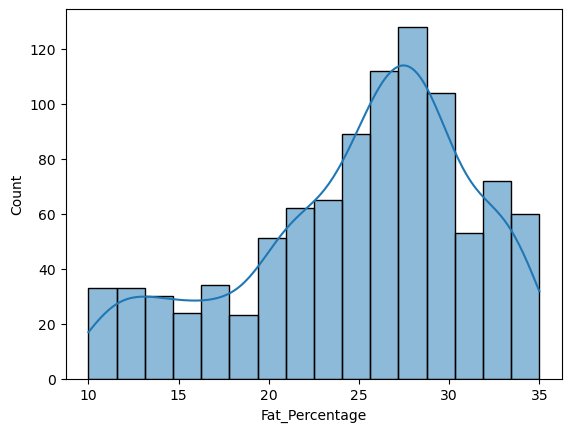

In [59]:
sns.histplot(df["Fat_Percentage"], kde=True)
plt.show()

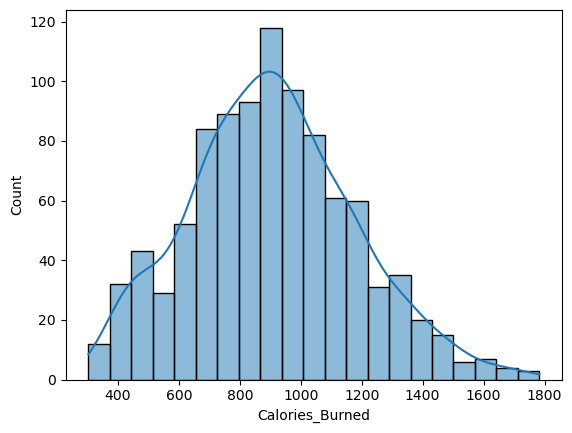

In [61]:
sns.histplot(df["Calories_Burned"], kde=True)
plt.show()

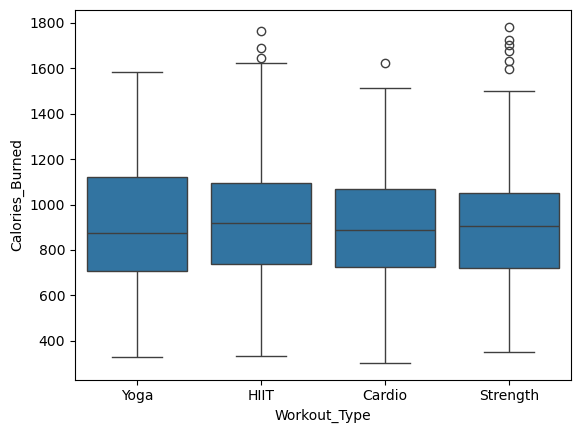

In [62]:
sns.boxplot(data=df, x="Workout_Type", y="Calories_Burned")
plt.show()

### 1.  Is there a significant difference in daily water intake in beginner, intermediate and expert gym members?

### 2. Can we predict a person’s Body Fat percentage based on workout habits and demographic data

### 3.  Is there a significant difference in average calories burned per session between different workout types ?